In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [3]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pickle
# !pip install pickleshare


In [6]:
df_titanic = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/train.csv')
df_titanic_test_in = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/test_in.csv')
df_titanic_test_out = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/test_out.csv')

In [7]:
random_state = 1233

In [14]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_titanic_test_in.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
def rename_cols_df_titanic(df):
    dict_rename_cols_titanic = {'PassengerId':'id_passenger', 'Survived': 'is_survived', 
                                'Pclass': 'class_passenger', 'Name': 'name_passenger', 
                                'Sex': 'gender', 'Age': 'age', 'SibSp': 'sib_sp',
                                'Parch': 'parch', 'Ticket': 'id_ticket', 'Fare':'num_fare', 
                                'Cabin': 'type_cabin', 'Embarked':'is_embarked'}
    df.rename(columns=dict_rename_cols_titanic, inplace=True)
    df.head()
    return df

In [18]:
df_titanic = rename_cols_df_titanic(df_titanic)
df_titanic_test_in = rename_cols_df_titanic(df_titanic_test_in)
df_titanic_test_out = rename_cols_df_titanic(df_titanic_test_out)

In [19]:
df_titanic.head()

,id_passenger,is_survived,class_passenger,name_passenger,gender,age,sib_sp,parch,id_ticket,num_fare,type_cabin,is_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df_titanic_test_out.head()

,id_passenger,is_survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [21]:
df_titanic_test_in.head()

,id_passenger,class_passenger,name_passenger,gender,age,sib_sp,parch,id_ticket,num_fare,type_cabin,is_embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
mean_age = round(df_titanic['age'].mean(), 2)
mean_age

29.7

In [23]:
def get_who(row):
    # print(row, type(row))
    str_who = ""
    age = row['age']
    gender = row['gender']
    if 0<age<=12:
        str_who += 'child'
    elif 12<age<=50:
        str_who +=  'adult'
    elif 50<age:
        str_who +=  'senior'
    
    str_who += '_' + gender
    return str_who

In [24]:
df_titanic['who'] = df_titanic.apply(lambda row: get_who(row), axis=1)
df_titanic.head()

,id_passenger,is_survived,class_passenger,name_passenger,gender,age,sib_sp,parch,id_ticket,num_fare,type_cabin,is_embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult_female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult_female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult_male


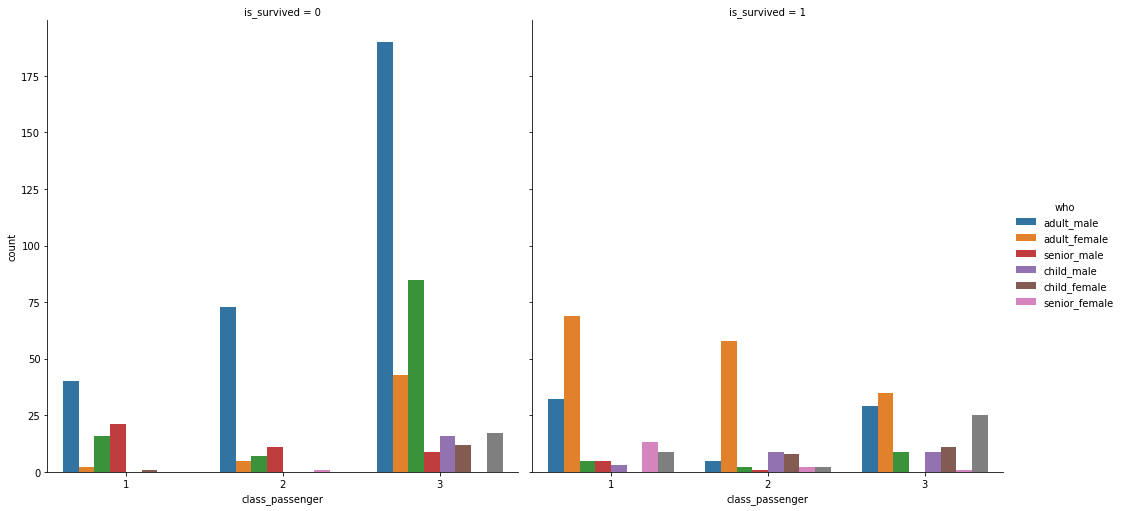

In [25]:
g = sns.catplot(x="class_passenger", hue="who", col="is_survived",
                data=df_titanic, kind="count",
                height=7);

In [27]:
def get_relevant_features(df, is_train=True):
    cols = ['gender', 'age', 'class_passenger']
    
    if is_train:
        cols += ['is_survived']
    
    cat_cols = ['gender', 'class_passenger']
    
    df_tmp = df[cols].copy()
    
    dict_na_values = {'age': mean_age}
    df_tmp = df_tmp.fillna(value=dict_na_values)
    df_tmp = df_tmp.dropna()
    df_tmp['class_passenger'] = df_tmp['class_passenger'].astype(str)
    
    for col in cat_cols:
        df_tmp[col] = df_tmp[col].astype('category')
    
    df_tmp = pd.get_dummies(df_tmp, columns=cat_cols)
    
    return df_tmp

In [28]:
col_target = 'is_survived'

df_train = get_relevant_features(df_titanic)
df_test = get_relevant_features(df_titanic_test_in, is_train=False)

y_train = list(df_train[col_target])
del df_train[col_target]

In [29]:
df_train.head()

,age,gender_female,gender_male,class_passenger_1,class_passenger_2,class_passenger_3
0,22.0,0,1,0,0,1
1,38.0,1,0,1,0,0
2,26.0,1,0,0,0,1
3,35.0,1,0,1,0,0
4,35.0,0,1,0,0,1


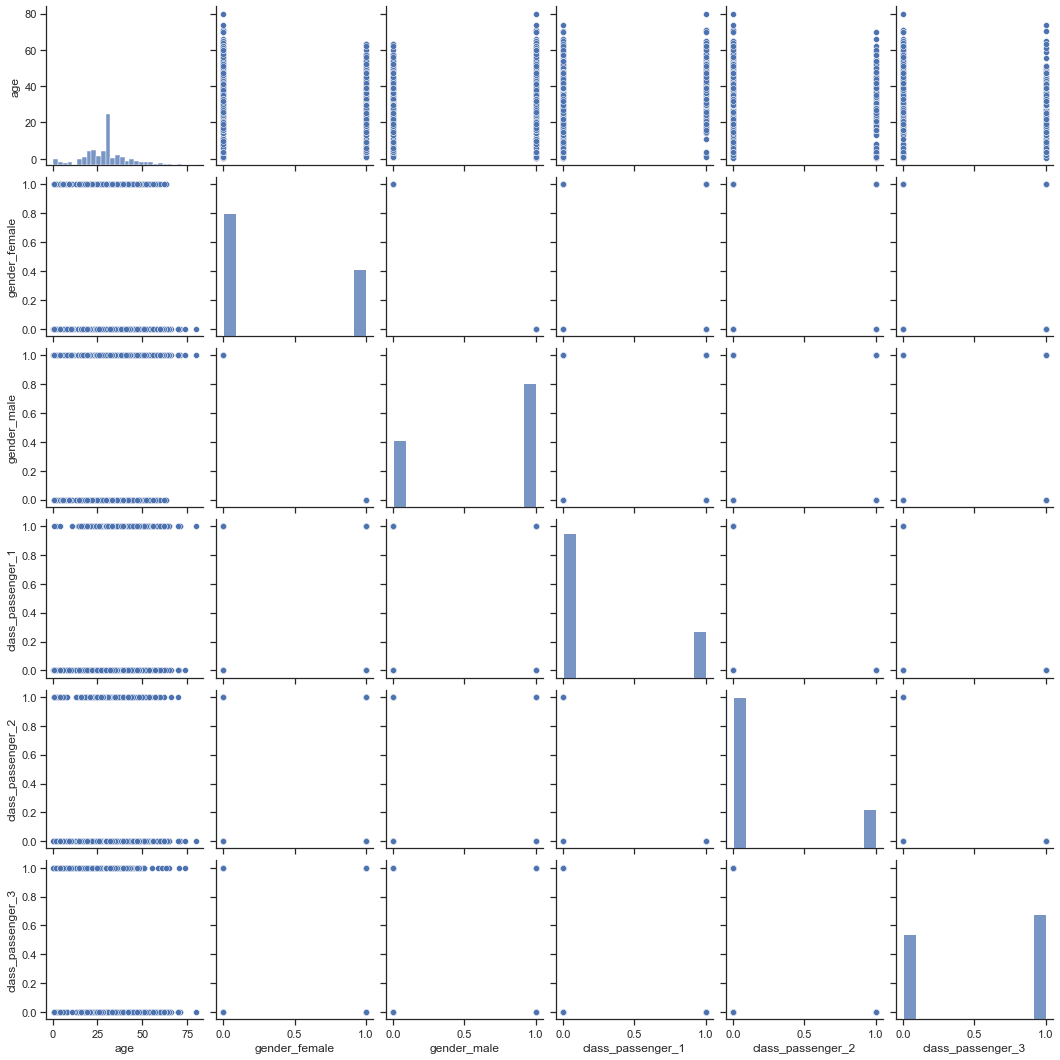

In [30]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_train)

plt.show()

In [31]:
df_test.head()

,age,gender_female,gender_male,class_passenger_1,class_passenger_2,class_passenger_3
0,34.5,0,1,0,0,1
1,47.0,1,0,0,0,1
2,62.0,0,1,0,1,0
3,27.0,0,1,0,0,1
4,22.0,1,0,0,0,1


In [32]:
train_x, eval_x, train_y, eval_y = train_test_split(df_train, y_train, test_size=0.3, random_state=random_state)

In [33]:
model_rfc = RandomForestClassifier(random_state=random_state)

In [34]:
dict_param_grid = { 
    'n_estimators': [x for x in range(100, 500, 100)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [x for x in range(3, 9, 2)],
    'criterion' :['gini', 'entropy']
}
dict_param_grid

{'n_estimators': [100, 200, 300, 400],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [3, 5, 7],
 'criterion': ['gini', 'entropy']}

In [35]:
cv_rfc = GridSearchCV(estimator=model_rfc, param_grid=dict_param_grid, cv=7)
cv_rfc.fit(train_x, train_y)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1233),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [36]:
model_rfc_best = RandomForestClassifier(random_state=random_state, 
                                        max_features='auto', 
                                        n_estimators= 200, 
                                        max_depth=8, 
                                        criterion='gini')

In [37]:
model_rfc_best.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=1233)

In [38]:
pred_y = model_rfc_best.predict(eval_x)

In [39]:
print(f"Accuracy: RandomForestClassifier on eval data: {round(accuracy_score(eval_y, pred_y)*100, 2)}%")


Accuracy: RandomForestClassifier on eval data: 76.12%


In [40]:
def predict_id(model, list_ids):
    df_tmp = df_titanic_test_in[df_titanic_test_in['id_passenger'].isin(list_ids)]
    df_y = df_titanic_test_out[df_titanic_test_out['id_passenger'].isin(list_ids)]
    
    df_tmp = get_relevant_features(df_tmp, is_train=False)
    list_pred = list(model.predict(df_tmp))
    
    list_actual = list(df_y['is_survived']) 
    print(f"actual: {list_actual}")
    print(f"pred__: {list_pred}")

In [41]:
list_ids = [x for x in range(900, 910)]
list_ids

[900, 901, 902, 903, 904, 905, 906, 907, 908, 909]

In [42]:
predict_id(model_rfc_best, list_ids)


actual: [1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
pred__: [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


In [43]:
def load_model(file_path='./models/rfc.pkl'):
    with open(file_path, 'rb') as file_obj:
        model = pickle.load(file_obj)
    return model

def save_model(model, file_path='./models/rfc.pkl'):
    with open(file_path, 'wb') as file_obj:
        pickle.dump(model, file_obj)

age = 0.38210055042305063
gender_female = 0.22216363854297247
gender_male = 0.20332886686449148
class_passenger_1 = 0.06682949318912214
class_passenger_2 = 0.021561823490050928
class_passenger_3 = 0.10401562749031228


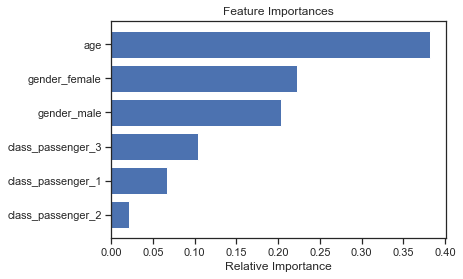

In [45]:
for name, importance in zip(df_train.columns, model_rfc_best.feature_importances_):
    print(name, "=", importance)

features = df_train.columns
importances = model_rfc_best.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()